<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/TSLA_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()
plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
startDate = '2018-01-01'
endDate = '2022-12-31'
df = pdr.get_data_yahoo('TSLA', start=startDate, end=endDate)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

Date
2018-01-02    21.368668
2018-01-03    21.150000
2018-01-04    20.974667
2018-01-05    21.105333
2018-01-08    22.427334
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

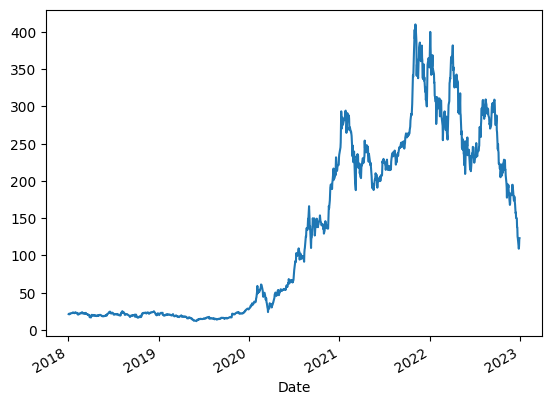

In [4]:
df.plot()

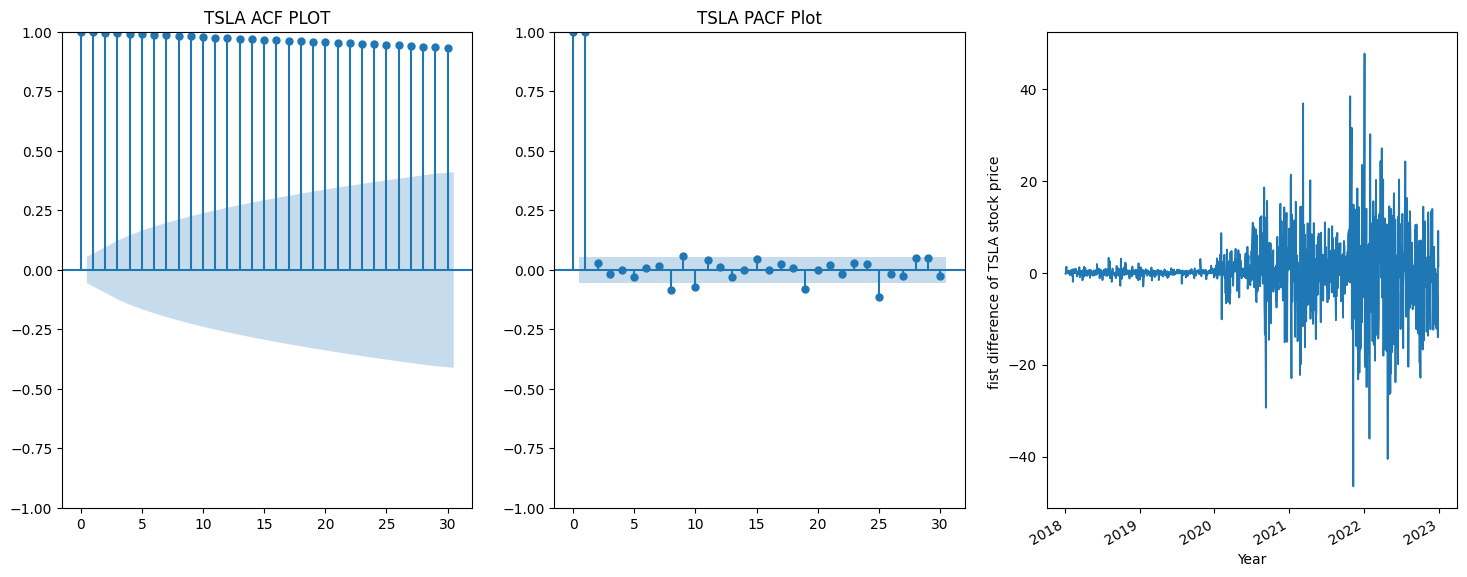

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sm.graphics.tsa.plot_acf(df, lags=30, ax=ax[0], title='TSLA ACF PLOT')
sm.graphics.tsa.plot_pacf(df, lags=30, ax=ax[1], title='TSLA PACF Plot')
df.diff().plot(linewidth=1.3, ax=ax[2], xlabel='Year', ylabel= 'fist difference of TSLA stock price ' )
plt.show()

# MA(1) model with original TSLA price

In [6]:
# MA(1) model for TSLA price
tsla_ma1 = statsmodels.tsa.arima.model.ARIMA(df, order=(0, 0, 1)).fit()
print(tsla_ma1.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const      131.768352
ma.L1        0.961048
sigma2    3748.929742
dtype: float64


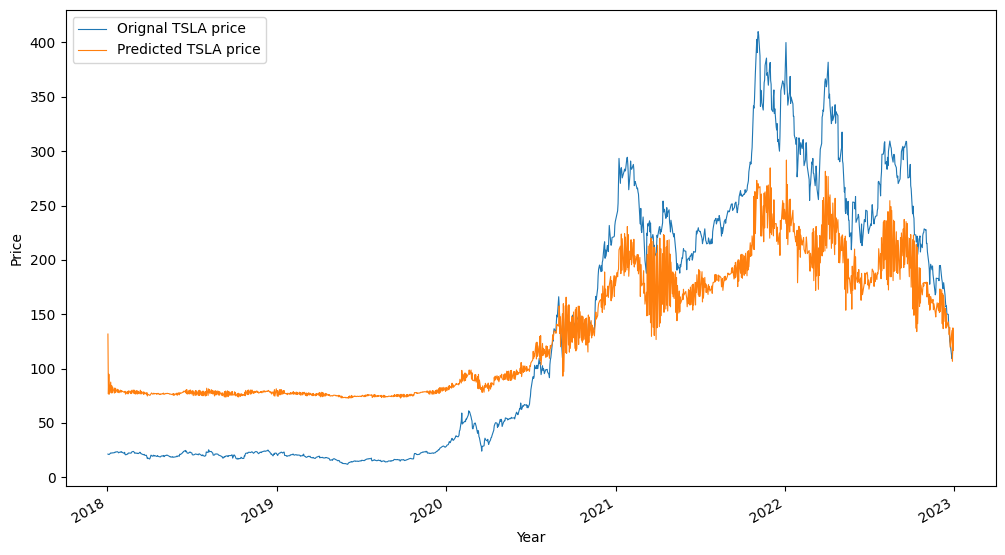

In [7]:
# plt.figure(figsize(18, 7))
plt.figure(figsize=(12,7))
tsla_ma1_res = tsla_ma1.resid
tsla_ma1_fit = df - tsla_ma1_res
df.plot(linewidth=0.8, label='Orignal TSLA price')
tsla_ma1_fit.plot(linewidth=0.8, label='Predicted TSLA price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show();

In [8]:
tsla_ma2 = statsmodels.tsa.arima.model.ARIMA(df, order=(0,1,1)).fit()
print(tsla_ma2.params)

ma.L1     -0.036336
sigma2    48.445453
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


We can see now we only have estimated  𝜃
  =  -0.036336 but no intercept. It is because we are modeling the first difference. Let's check the actual vs. predicted graph.

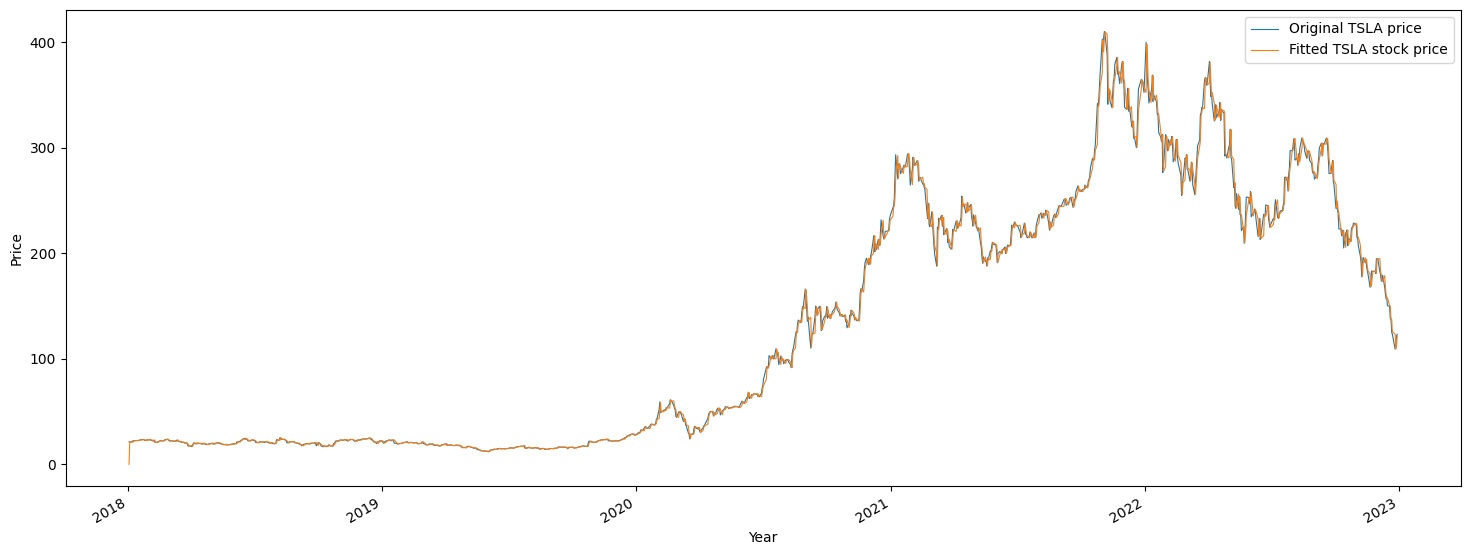

In [9]:
plt.figure(figsize=(18, 7))
tsla_ma2_res = tsla_ma2.resid
tsla_ma2_fit = df - tsla_ma2_res
df.plot(linewidth = 0.8, label='Original TSLA price')
tsla_ma2_fit.plot(linewidth = 0.8, label='Fitted TSLA stock price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

We can see from figure 14 that first differencing resulted in a considerably better model than for the original dataset. It also highlights the importance of making a time series stationary before determining a model for the stationary part of the same.

## ARIMA Application: TSLA STock Price

Demonstration of application of ARIMA to build a model for financial assets. This will follow the Box-Jenkins methodology

## 1. Model Identification and Model Estimation
Model identification has always been a trial and error process. We usually try differnet model unitil we get a satisfactory one. During the pocess of search for a fit model we will of course estimate a model candidate. hence, we will combine model identification and model estimation together

Firts, let plot TSLA's stock time series plot, ACF and PACF plot to take a look at the data

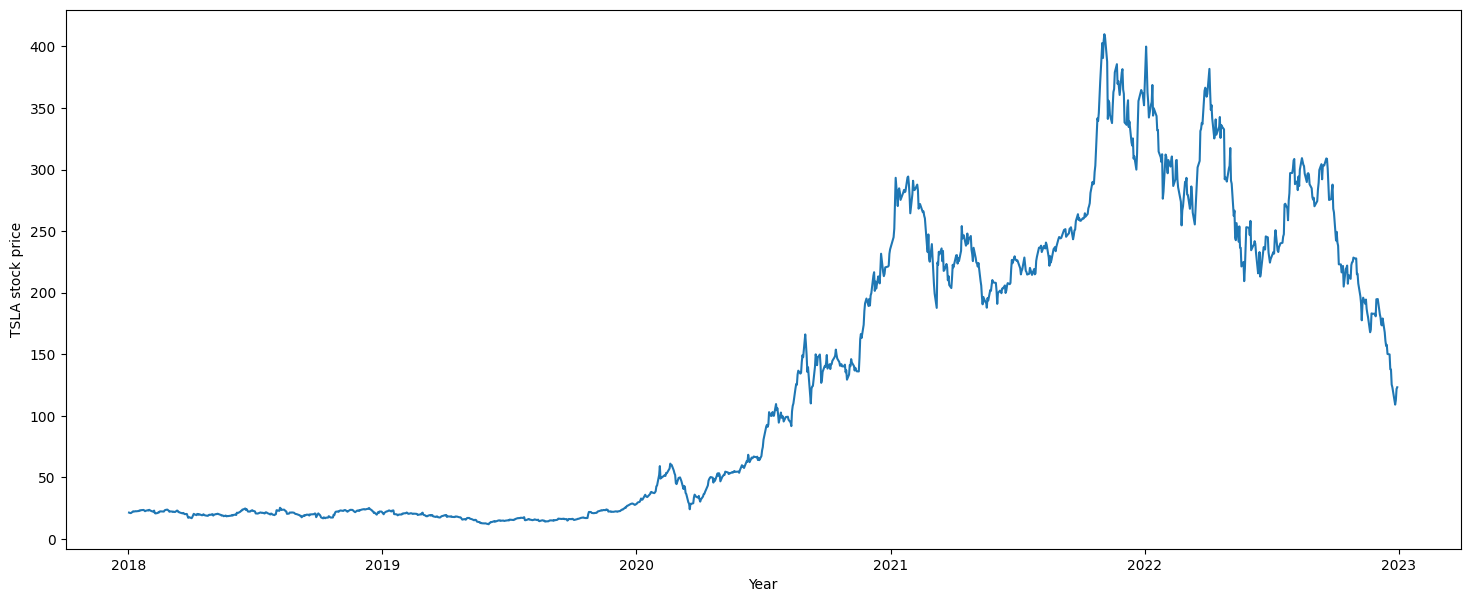

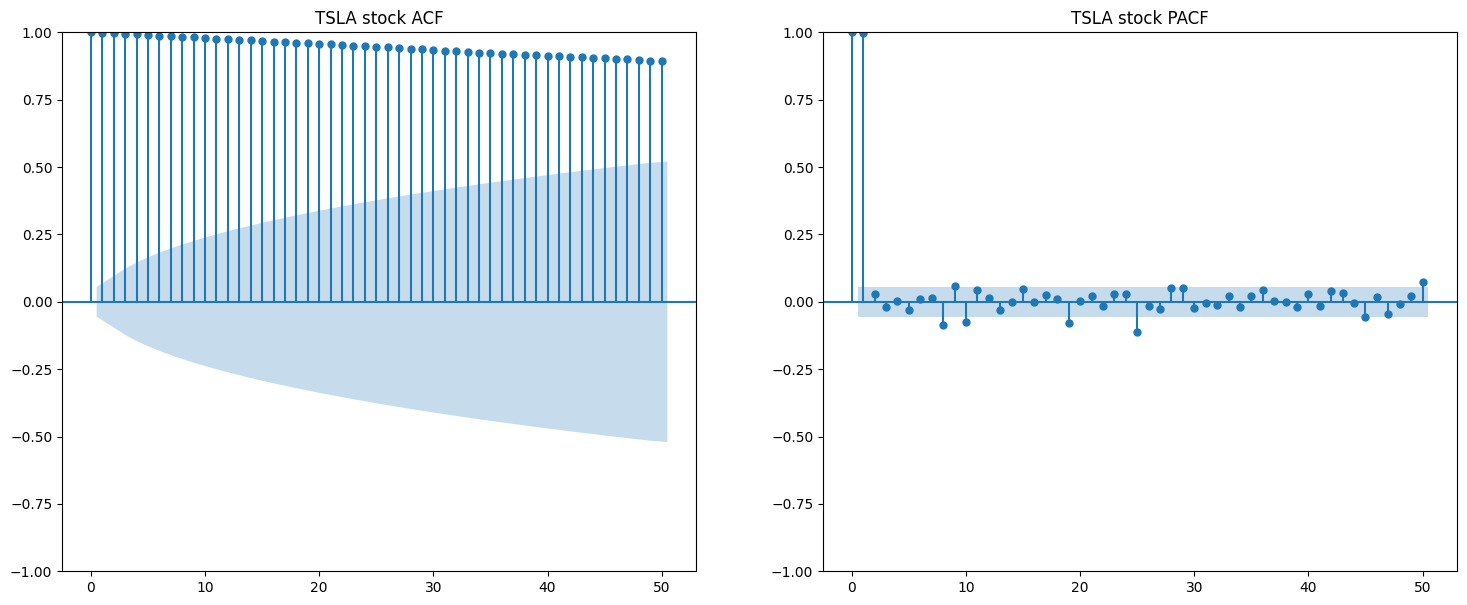

In [13]:
plt.figure(figsize = (18, 7))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('TSLA stock price')
plt.show()

# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
sm.graphics.tsa.plot_acf(df, title='TSLA stock ACF', lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(df, title='TSLA stock PACF', lags=50, ax=ax2)
plt.show()

From the time series plot, we can see that there is an upward trend for TSAL stock price from 2016 to 2022. The ACF plot also shows a slow decreasing trend which indicates a trend in the time series

By using the Box-Jenkins method, we will try to use the differencing method to remodve the trend and keep investigationg the tim series

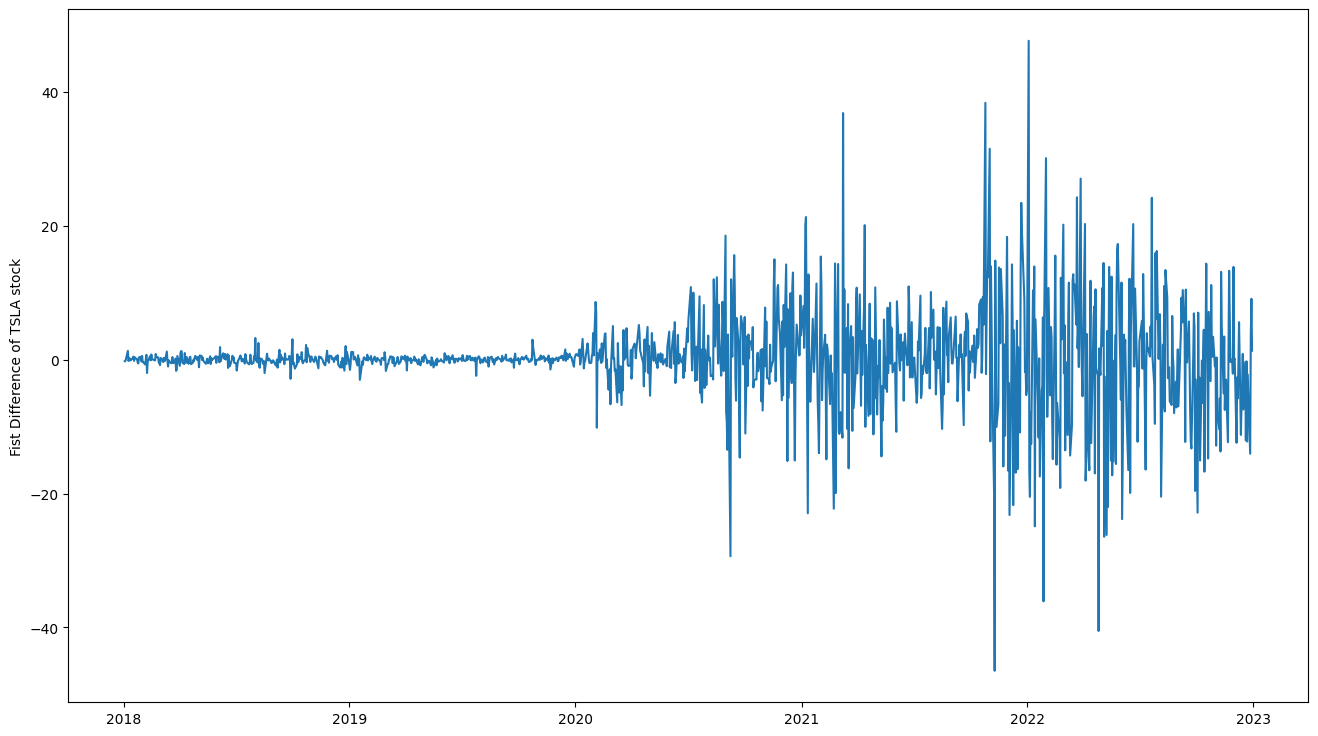

In [16]:
# Plot of first differencing of TSLA stock price
plt.plot(df.diff().dropna())
plt.ylabel('Fist Difference of TSLA stock')
plt.show()

We can see that now the differenced time series oscillates around 0, but the recent movements are more volatile. This indicates that the variance is not constant. It is very common for the financial time series data to have non-constant varaiance. One way to adjust the time series with non-constant variance is to take the log of the time series. Lets' take the log odf TSLA's stock and do the first differencing. The first difference of the logged TSLA stock price is very close to the TSLA stock price return, if the return is relatively small. Therefore, in many finance research field, the above method is a way to get the return fo financial asset.

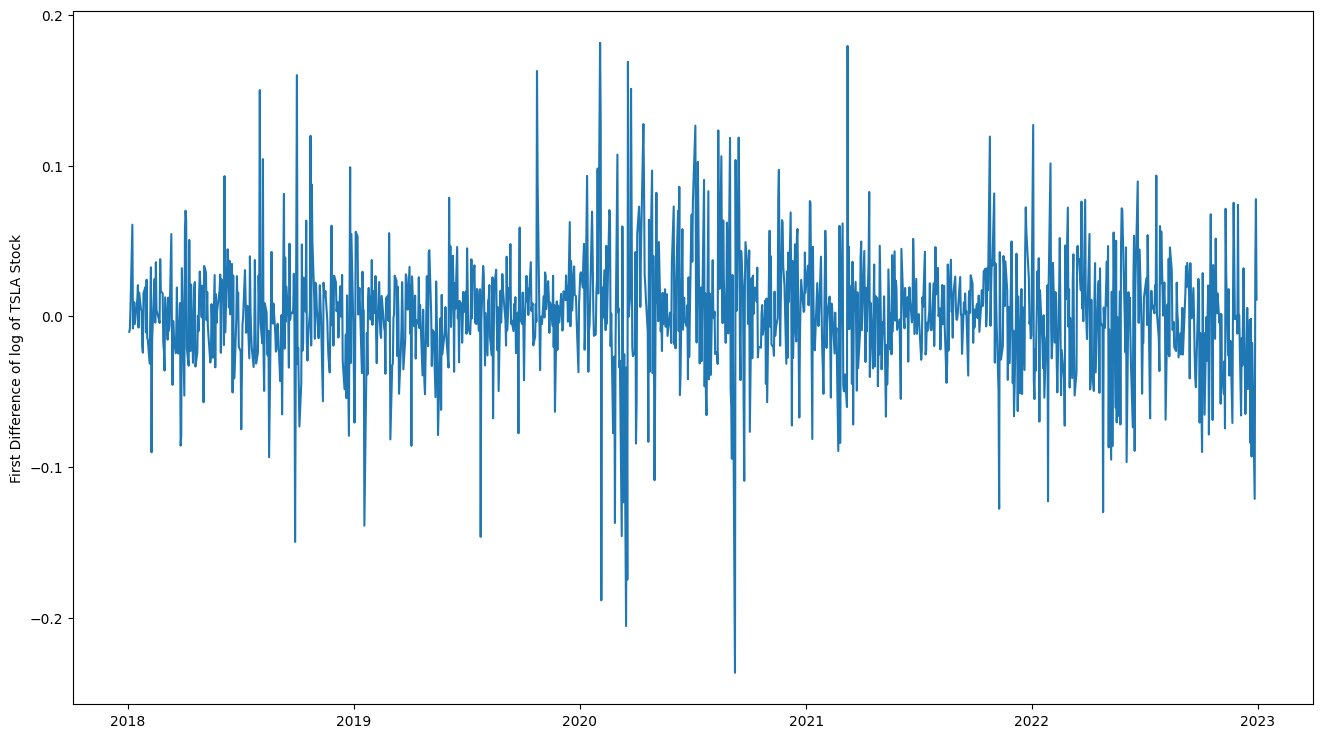

In [17]:
# Plot First difference of the log of TSLA stock price
plt.plot(np.log(df).diff().dropna())
plt.ylabel('First Difference of log of TSLA Stock')
plt.show()

From he above, the new time series has a more stable varaince ebven though the second half of the investigated period still has higher variation. we will introduce another time series model to model non-cnstant variance in the next module. Let's check ACF and PACF plots for the first diffrebce of the logged TSLA stock price.

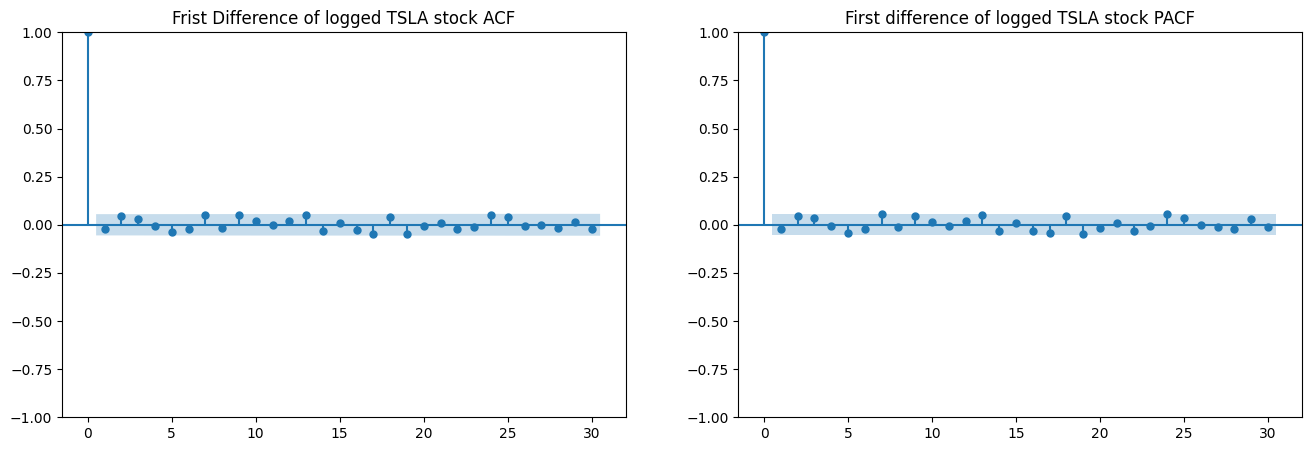

In [19]:
# ACF and PACF plots for first Difference of logged TSLA Stock Price
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    np.log(df).diff().dropna(),
    title='Frist Difference of logged TSLA stock ACF',
    lags=30,
    ax=ax1
)
sm.graphics.tsa.plot_pacf(
    np.log(df).diff().dropna(),
    title='First difference of logged TSLA stock PACF',
    lags=30,
    ax=ax2
)
plt.show()

It seems that we can try p=1 and q=1 or any other combinations. Fortunately, the statiscal software, can automatically test several models and report back the  best model with the lowest AIC. The following report shows various models and theri corresponding AICs

## ARIMA Model Selection Report

In [29]:
from yfinance.utils import auto_adjust
# Efficient ARIMA model selection
mod_can_auto = auto_arima(
    np.log(df).dropna(), # stepwise=false
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=3,
    max_d=3,
    max_q=3,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4449.992, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4448.527, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4448.472, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4446.058, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4449.428, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.738 seconds


We can see the software ran a couple of ARIMA models and report their AICs

On the left of the table is the ARIMA model specification, and on the right is the model AICs. The best model from the software is AIMA(0,1,0). We can see that ARIMA(0,1,0) has the best lowest AIC(-4449.992) among other model candidates.

## ARIMA(0,1,0) Model Estimation

In [33]:
# Best ARIMA Model for TSLA stock price
mod_can_a= ARIMA(
    np.log(df), order=(0, 1, 0), trend='n'
).fit() # This is the best model in Python implementation
print(mod_can_a.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1259
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2225.996
Date:                Mon, 04 Sep 2023   AIC                          -4449.992
Time:                        17:28:01   BIC                          -4444.855
Sample:                             0   HQIC                         -4448.062
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017   4.03e-05     42.238      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               721.77
Prob(Q):                              0.44   Pr

## Model Diagnostics

Now we have indentified the ARIMA model to medel the TSLA stock price and have built and estimated the model. Let's check the model model diagnostics to see if there ae some potential structural patterns in TSLA stock price time series that our ARIMA model does not capture

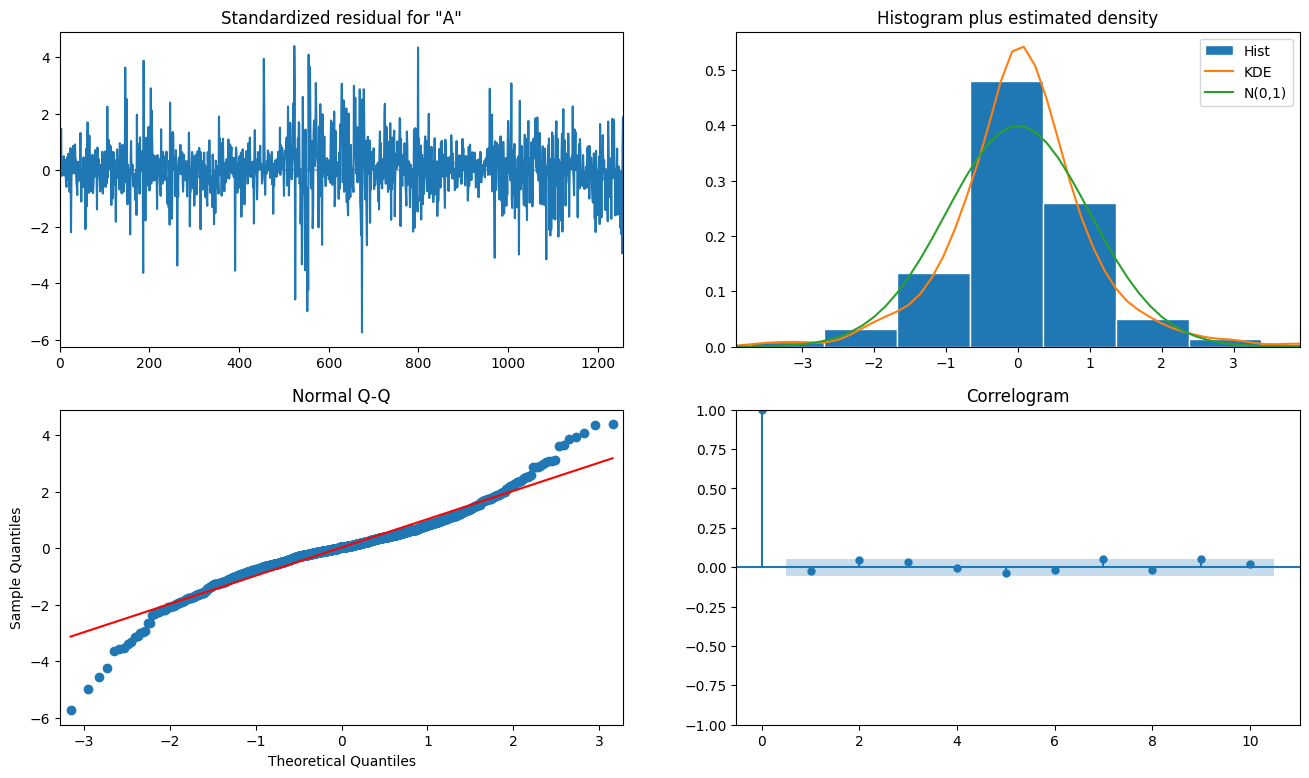

In [34]:
# Diagnostic Report for ARIMA(0,1,0) model
mod_can_a.plot_diagnostics()
plt.show()

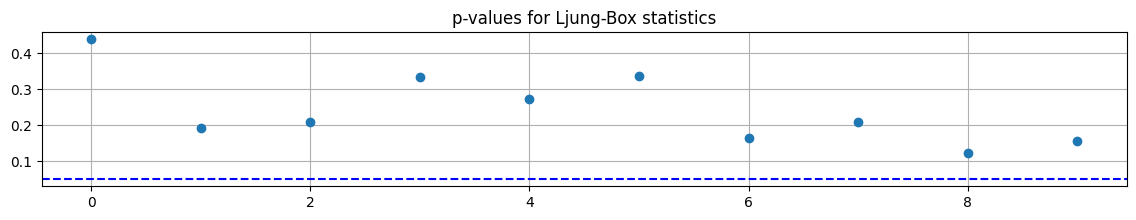

In [40]:
# Ljung-Box test for a serial correlation of standardized residuals
lb_test = mod_can_a.test_serial_correlation(
    method='ljungbox', df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.5 signifcance line
plt.figure(figsize=(14, 2))
plt.plot(lb_test[0][1], linestyle="", marker='o')
plt.axhline(y=0.05, color='blue', linestyle='--')
plt.title('p-values for Ljung-Box statistics')
plt.grid()
plt.show()



The diagnostics graph, the stardard residuals graph, indicate that there are period where the variation ishigher than other periods. In the ACF plot for the residual, all the lags are significant. There might be seasonality activity that the model does not capture. Fromthe QQ plot for the residuals, we can see the residuals are not normally distributed since the plot shows fat tails at both ends.

The Ljung-Box test is to test if a group of autocorrelations from model residuals are small enough to claim the residuals are independent. The test conducts n hypthesis tests for the following n autocorrelation groups

> Group 1: autocorrelation 1 <br>
> Group 2: autocorrelation 1, autocorrelation 2 <br>
> Group 3: autocorrelation 1, autocorrelation 2, autocorrelation 3 <br>
> $\quad \vdots$ <br>
> Group $n$: autocorrelation 1, autocorrelation 2, autocorrelation 3, …., autocorrelation $n$ <br>

Each hypothesis test is constructed as follows:

> - Null hypothesis $H_0$: all autocorrelations in the group are small enough so that residuals are independent
> - Alternative hypothesis $H_1$: all autocorrelations in the group are not small enough so that the residuals are not independent

If the $p$-value from each hypothesis test is $> 0.05$, we cannot reject the null hypothesis. We then conclude that residuals from this model are independent.

Now that we know what the Ljung-Box test is, we can look at the test graph report in figure 8. From the plot, we see that the groups with lags equal to and less than 5 are all not significant. However, from lag 6 and afterwards, there are some autocorrelations that exist from Ljung-Box Test. Combining this piece of information with ACF plot for residuals, we see there might be a seasonality component that the model neglects to capture.


## Forecast of ARIMA(0,1,0)

Next, once we are satisfied with our model result, we will start to forecast where TSLA stock price will be , we forecast TSLA stock prices for the next 100 days with 80% confidence internal and 95% confidence interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


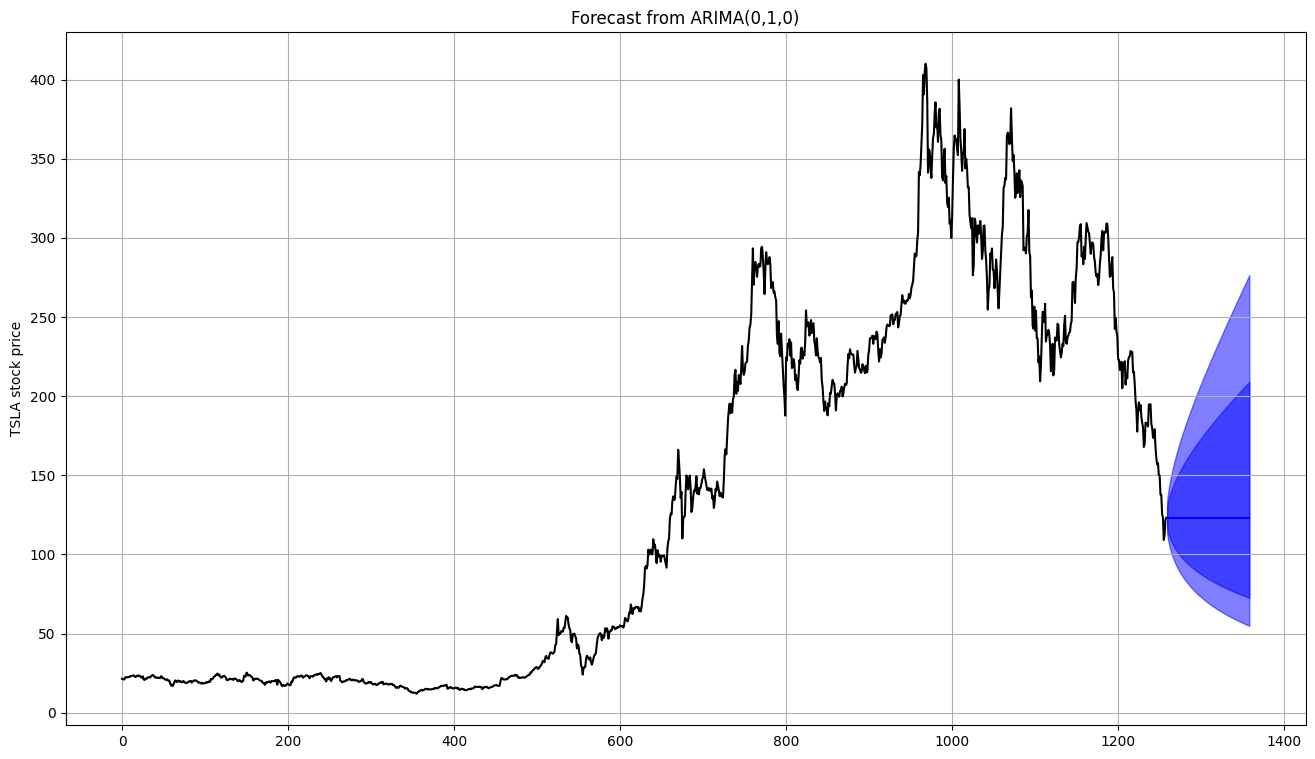

In [48]:
# Forecast plot of ARIMA(0,1,0) with 95% confidence interval

# Plot TSLA data
ffx = df.copy()
ffx.index = [i for i in range(len(df))]
ffx.plot(ylabel='TSLA stock price', title='Forecast from ARIMA(0,1,0)', color='k')

#get forcast data for the next 100 steps
forecast = mod_can_a.get_forecast(steps=100)
forecast_mean = np.exp(forecast.predicted_mean) # Mean of forecast data
conf_int95 = forecast.conf_int(alpha=0.05) # 95% confidence interval
conf_int80 = forecast.conf_int(alpha=0.2) # 80% confidence interval

# Plot mean forecast and 95% and 80% confidence intervals
plt.plot(forecast_mean, c='b')
plt.fill_between(
    conf_int95.index,
    np.exp(conf_int95['lower Adj Close']),
    np.exp(conf_int95['upper Adj Close']),
    color='b',
    alpha=0.5

)

plt.fill_between(
    conf_int80.index,
    np.exp(conf_int80['lower Adj Close']),
    np.exp(conf_int80['upper Adj Close']),
    color='b',
    alpha=0.5

)
plt.grid()
plt.show()